In [425]:
import pandas as pd # Database module
import numpy as np #Linear Algebra module
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier

import matplotlib.pyplot as plt, seaborn as sns #Plotting module
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, precision_score, recall_score
import seaborn as sns # adv plotting module
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import warnings # To ignore unnecesseary warnings
from sklearn import tree

from sklearn.linear_model import LogisticRegression


In [427]:
df = pd.read_csv("Matches.csv")
#cleaning the data
df.drop(columns = ['HTResult',], inplace = True)
df.drop(columns = ['HomeTeam','AwayTeam','Division', 'MatchDate', 'MatchTime'], inplace = True)
df.drop(columns = ['HomeShots', 'AwayShots', 'HomeTarget', 'AwayTarget','OddDraw', 'MaxDraw',
       'HomeFouls', 'AwayFouls', 'HomeCorners', 'AwayCorners', 'HomeYellow',
       'AwayYellow', 'HomeRed', 'AwayRed','FTHome','FTAway','HTHome','HTAway'], inplace = True)

df = df[df.FTResult != 'D']

df_cleaned=df.dropna()
display(df_cleaned)

C:\Users\lehuu\AppData\Local\Temp\ipykernel_13036\3622497514.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Matches.csv")


,HomeElo,AwayElo,Form3Home,Form5Home,Form3Away,Form5Away,FTResult,OddHome,OddAway,MaxHome,MaxAway,Over25,Under25,MaxOver25,MaxUnder25,HandiSize,HandiHome,HandiAway
27450,1720.28,1640.38,4.0,7.0,3.0,5.0,H,1.50,6.50,1.60,9.00,2.11,1.62,2.25,1.75,-1.0,1.98,1.86
27451,1483.16,1479.83,5.0,6.0,1.0,3.0,H,2.00,3.80,2.20,4.30,2.26,1.50,2.35,1.70,-0.3,1.87,2.05
27455,1503.65,1615.65,9.0,13.0,6.0,9.0,H,2.75,2.50,2.80,2.70,2.27,1.49,2.35,1.65,0.0,1.86,2.06
27456,1471.34,1555.74,1.0,1.0,6.0,6.0,A,2.40,3.00,2.75,3.00,2.09,1.59,2.15,1.70,0.0,1.69,2.30
27457,1547.06,1475.78,6.0,6.0,1.0,7.0,H,1.66,5.00,1.75,5.70,2.20,1.53,2.30,1.65,-0.8,2.01,1.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228370,1676.43,1767.26,6.0,6.0,6.0,9.0,A,2.71,2.69,2.75,2.75,2.01,1.84,2.07,1.88,0.0,1.95,1.98
228371,1842.71,1556.90,3.0,6.0,3.0,3.0,H,1.17,14.69,1.19,16.50,1.28,3.72,1.30,3.90,-2.3,2.00,1.93
228373,1757.62,1584.51,1.0,4.0,1.0,1.0,H,1.52,5.83,1.56,6.50,1.64,2.29,1.69,2.34,-1.0,1.88,2.02
228375,1785.53,1926.48,9.0,9.0,3.0,9.0,A,3.22,2.04,3.35,2.10,1.34,3.29,1.37,3.40,0.5,1.84,2.06


<Axes: >

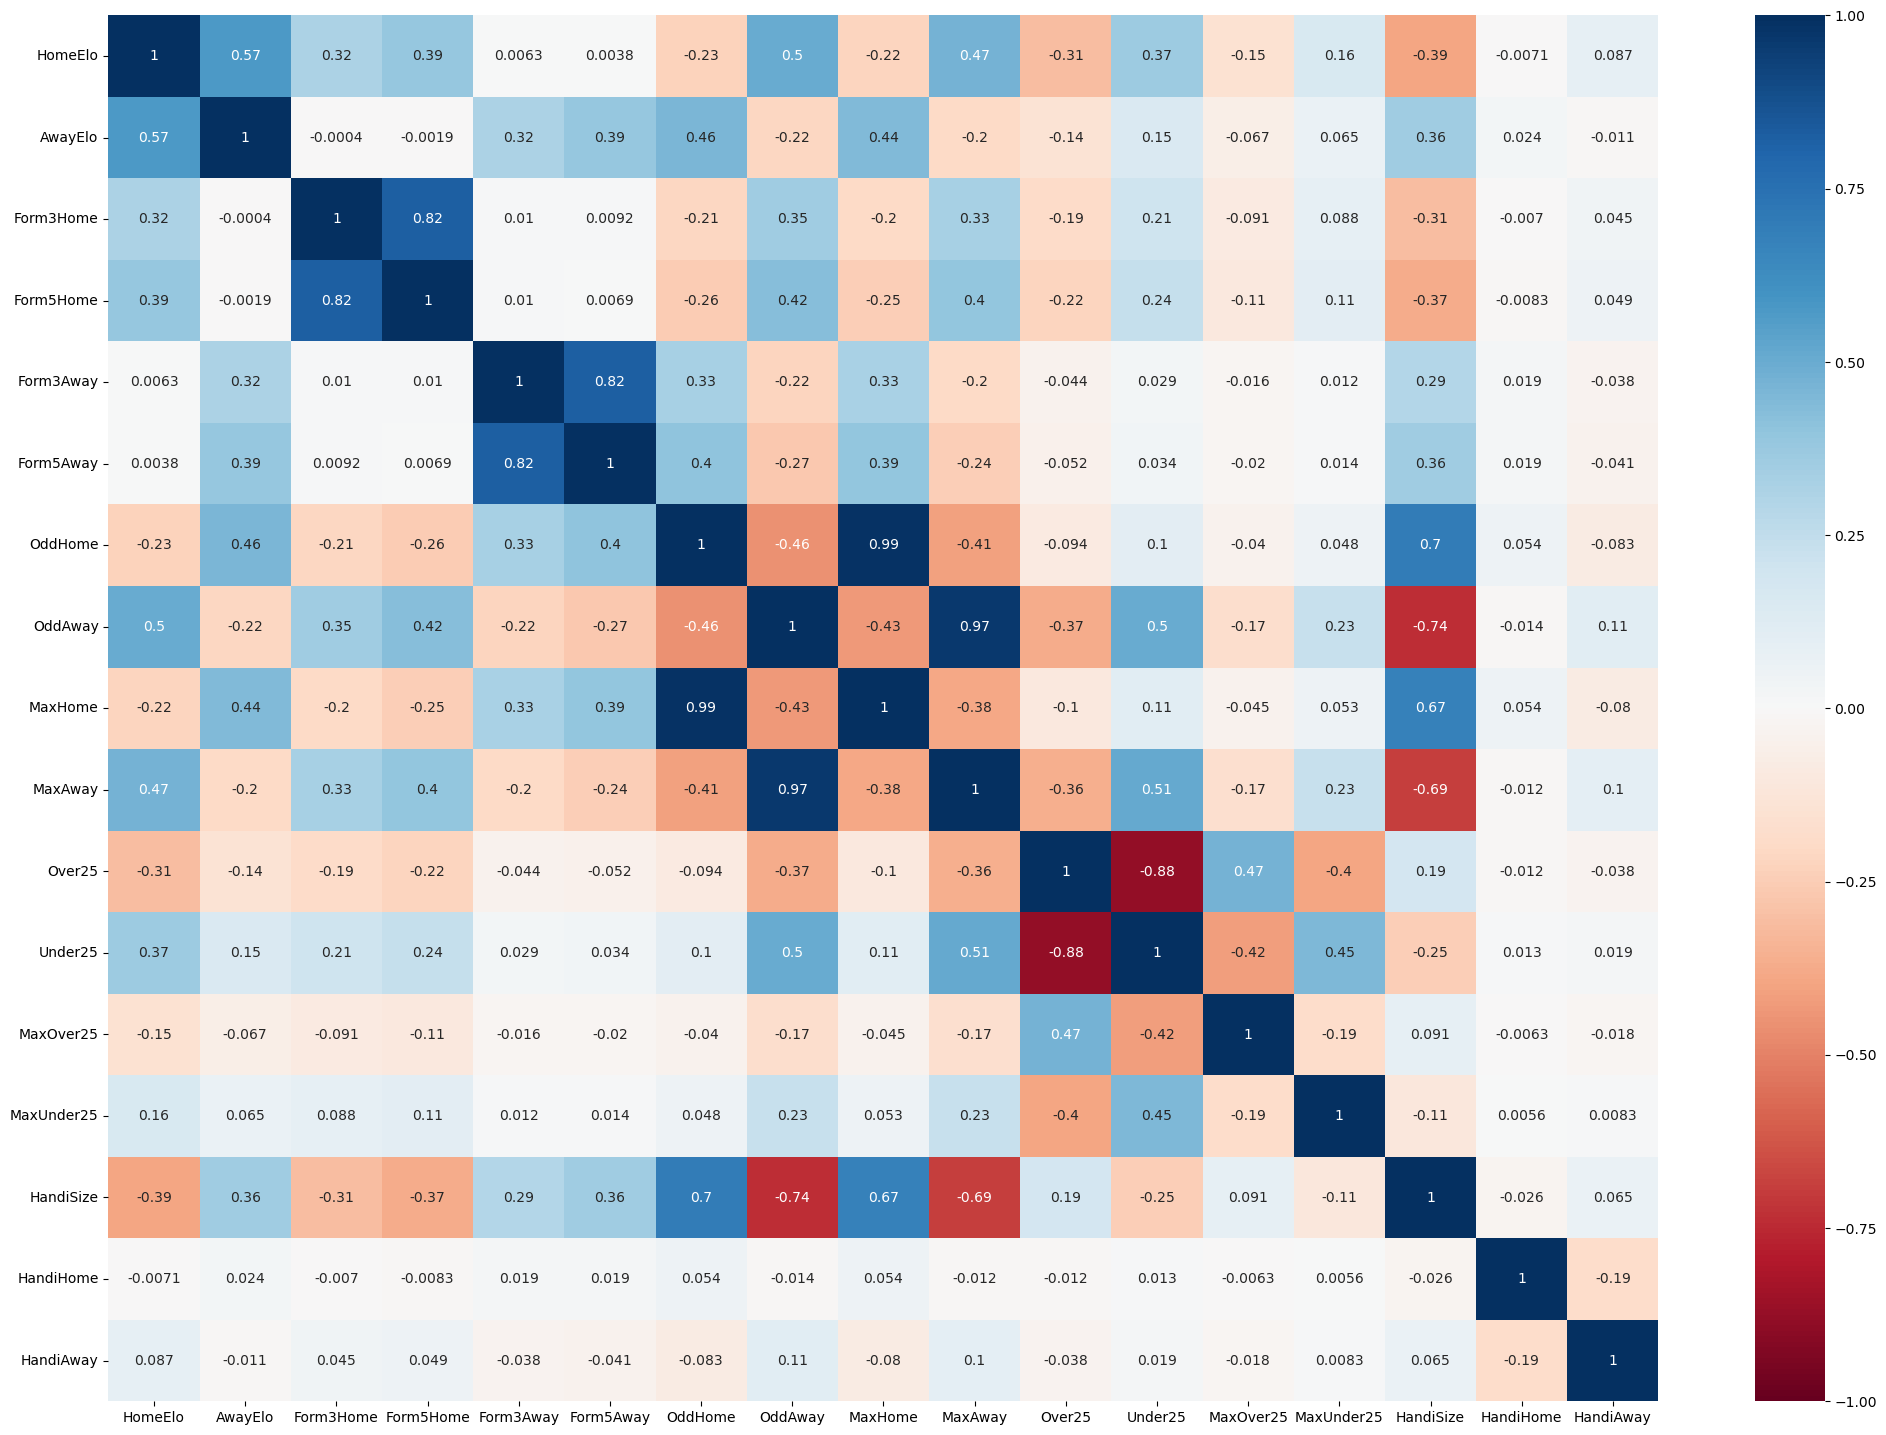

In [429]:
#Visualize the data
plotdata = df_cleaned.drop(columns=['FTResult'])
plt.figure(figsize=(25,18))
# generate pearson correlation matrix plot in form of heatmap
sns.heatmap(plotdata.corr(), annot=True, vmin=-1, vmax=1, center=0, cmap='RdBu')

In [431]:
data = df_cleaned
X = df_cleaned.drop(columns=['FTResult'])
y = data.FTResult
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)


display(X)

,HomeElo,AwayElo,Form3Home,Form5Home,Form3Away,Form5Away,OddHome,OddAway,MaxHome,MaxAway,Over25,Under25,MaxOver25,MaxUnder25,HandiSize,HandiHome,HandiAway
27450,1720.28,1640.38,4.0,7.0,3.0,5.0,1.50,6.50,1.60,9.00,2.11,1.62,2.25,1.75,-1.0,1.98,1.86
27451,1483.16,1479.83,5.0,6.0,1.0,3.0,2.00,3.80,2.20,4.30,2.26,1.50,2.35,1.70,-0.3,1.87,2.05
27455,1503.65,1615.65,9.0,13.0,6.0,9.0,2.75,2.50,2.80,2.70,2.27,1.49,2.35,1.65,0.0,1.86,2.06
27456,1471.34,1555.74,1.0,1.0,6.0,6.0,2.40,3.00,2.75,3.00,2.09,1.59,2.15,1.70,0.0,1.69,2.30
27457,1547.06,1475.78,6.0,6.0,1.0,7.0,1.66,5.00,1.75,5.70,2.20,1.53,2.30,1.65,-0.8,2.01,1.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228370,1676.43,1767.26,6.0,6.0,6.0,9.0,2.71,2.69,2.75,2.75,2.01,1.84,2.07,1.88,0.0,1.95,1.98
228371,1842.71,1556.90,3.0,6.0,3.0,3.0,1.17,14.69,1.19,16.50,1.28,3.72,1.30,3.90,-2.3,2.00,1.93
228373,1757.62,1584.51,1.0,4.0,1.0,1.0,1.52,5.83,1.56,6.50,1.64,2.29,1.69,2.34,-1.0,1.88,2.02
228375,1785.53,1926.48,9.0,9.0,3.0,9.0,3.22,2.04,3.35,2.10,1.34,3.29,1.37,3.40,0.5,1.84,2.06


In [433]:
# Train model
decision_sklearn = DecisionTreeClassifier(max_depth=7)
decision_sklearn = decision_sklearn.fit(X_train, y_train)

# Make predictions and test accuracy
predictions_train = decision_sklearn.predict(X_train)
predictions_test = decision_sklearn.predict(X_test)
print("Train Accuracy: "+str(accuracy_score(y_train, predictions_train)))
print("Test Accuracy: "+str(accuracy_score(y_test, predictions_test)))

Train Accuracy: 0.700106223444139
Test Accuracy: 0.6914498141263941


In [434]:
text_representation = tree.export_text(decision_sklearn, feature_names=X.columns)
print(text_representation)

|--- MaxAway <= 3.08
|   |--- MaxHome <= 3.83
|   |   |--- OddHome <= 2.94
|   |   |   |--- MaxAway <= 2.75
|   |   |   |   |--- Form3Home <= 0.50
|   |   |   |   |   |--- HandiAway <= 1.70
|   |   |   |   |   |   |--- class: A
|   |   |   |   |   |--- HandiAway >  1.70
|   |   |   |   |   |   |--- Form3Away <= 5.50
|   |   |   |   |   |   |   |--- class: H
|   |   |   |   |   |   |--- Form3Away >  5.50
|   |   |   |   |   |   |   |--- class: H
|   |   |   |   |--- Form3Home >  0.50
|   |   |   |   |   |--- MaxAway <= 2.26
|   |   |   |   |   |   |--- class: A
|   |   |   |   |   |--- MaxAway >  2.26
|   |   |   |   |   |   |--- Form5Away <= 6.50
|   |   |   |   |   |   |   |--- class: A
|   |   |   |   |   |   |--- Form5Away >  6.50
|   |   |   |   |   |   |   |--- class: A
|   |   |   |--- MaxAway >  2.75
|   |   |   |   |--- Form3Away <= 4.50
|   |   |   |   |   |--- HomeElo <= 1357.91
|   |   |   |   |   |   |--- HandiAway <= 1.72
|   |   |   |   |   |   |   |--- class: A
|   |   |

In [437]:
forest_sklearn = RandomForestClassifier(n_estimators=500, max_depth=10, max_features="sqrt", bootstrap=True)
forest_sklearn = forest_sklearn.fit(X_train, y_train)

# Make predictions and test accuracy
predictions_train = forest_sklearn.predict(X_train)
predictions_test = forest_sklearn.predict(X_test)
print("Train Accuracy: "+str(accuracy_score(y_train, predictions_train)))
print("Test Accuracy: "+str(accuracy_score(y_test, predictions_test)))

Train Accuracy: 0.726349662584354
Test Accuracy: 0.6944591963179324
